# Corona Disease Prediction based on Symptoms using Machine Learning


**INTRODUCTION** :
                COVID-19 started in the Chinese province of
Hubei's Wuhan in December 2019. Since then, several waves
of covid-19 have hit people all around the world. As the whole
world was striving to combat the coronavirus disease
(COVID-19), healthcare and health monitoring systems were
struggling to confront the virus. Many cases had been
observed where COVID-19 could not be identified at a
specific time. Furthermore, any effective strategy that could
monitor the coronavirus state in the human body had not
been established.


**Section 1 :**

Question 1.**Why is your proposal important in today’s world? How predicting a disease accurately can improve medical treatment? **
The human body is guarded by the immune system, but
sometimes this system alone is not capable of preventing
our body from diseases. Environmental conditions and
living habits of individuals are the cause of many diseases that are the main reasons for a huge number of deaths in
the world, and diagnosing these diseases sometimes
becomes challenging. We need accurate, feasible, reliable,
and robust systems to diagnose diseases in time so that
these can be properly treated.

Question 2.**How is it going to impact the medical field *when* it comes to effective screening and reducing health care burden. **
The impact on healthcare systems is often reduced by
effective screening, which enables early and accurate identification of COVID-19. To support medical
professionals around the world in prioritizing patients,
particularly within the context of constrained healthcare
resources, prediction models that incorporate many
variables to work out the likelihood of infection have been
developed.

Question 3.**If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any other disease**
As a future scope of this model, this model can be made to
make more real time predictions using sensors compatible
with the attributes and the IoT system. The accuracy can be
made more accurate for all the regions by collecting more
data which is validated and is diverse. This can be
expanded further to other diseases and healthcare
guidelines

**Section 2:** Initial Hypothesis (or hypotheses)


QUESTION 1. If ML track please perform part ‘i’ as well as multiple machine learning models, perform all required steps to check if there are any assumptions and justify your model. Why is your model better than any other possible model? Please justify it by relevant cost functions and if possible by any graph.

STEPS FOLLOWED :
                

1.   DATA PROCESSING
2.   DATA ANALYSIS
3.   FEATURE SELECTION
4.   DATA MODELING
5.   MODEL EVALUATION




QUESTION 2. From step 1, you may see some relationship that you want to explore and will develop a belief about data.

The dataset's attributes include cough, fever,
sorethroat, shortness of breath, headache, corona ,
age 60 and above, Sex, and known contatc. The corona
result tells whether or not people may have the coronavirus
in their bodies. The dataset's majority of variables are in
boolean format.Encode  a feature variable's value is yes to 1," it
signifies that a specific symptom is present; if it is No ,
there's no symptom.

# Loading Required Libraries¶


In [26]:
# Data Preprocessing //imporationg libraries

import numpy as np
import pandas as pd

# Data Analysis

import plotly.express as px
import missingno as msno

# Feature Selection

import scipy.stats as stats
from scipy.stats import chi2_contingency

# Data Modeling

from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Model Evaluation & saving the model

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, recall_score, accuracy_score, precision_score, f1_score
import pickle

## Reading The Data

In [27]:
# Loading the Data

data = pd.read_csv("/content/corona_tested_006.csv")
data.head()

<ipython-input-27-acc243f898ea>:3: DtypeWarning:

Columns (2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.



Ind_ID   Test_date Cough_symptoms  Fever Sore_throat Shortness_of_breath  \
0       1  11-03-2020           TRUE  FALSE        TRUE               FALSE   
1       2  11-03-2020          FALSE   TRUE       FALSE               FALSE   
2       3  11-03-2020          FALSE   TRUE       FALSE               FALSE   
3       4  11-03-2020           TRUE  FALSE       FALSE               FALSE   
4       5  11-03-2020           TRUE  FALSE       FALSE               FALSE   

  Headache    Corona Age_60_above   Sex           Known_contact  
0    FALSE  negative         None  None                  Abroad  
1    FALSE  positive         None  None                  Abroad  
2    FALSE  positive         None  None                  Abroad  
3    FALSE  negative         None  None                  Abroad  
4    FALSE  negative         None  None  Contact with confirmed

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


Dataset has 14621 records and 10 features

In [29]:
# Checking the levels for categorical features

def show(data):
  for i in data.columns[1:]:
    print("Feature: {} with {} Levels".format(i,data[i].unique()))

show(data)

Feature: Test_date with ['11-03-2020' '12-03-2020' '13-03-2020' '14-03-2020' '15-03-2020'
 '16-03-2020' '17-03-2020' '18-03-2020' '19-03-2020' '20-03-2020'
 '21-03-2020' '22-03-2020' '23-03-2020' '24-03-2020' '25-03-2020'
 '26-03-2020' '27-03-2020' '28-03-2020' '29-03-2020' '30-03-2020'
 '31-03-2020' '01-04-2020' '02-04-2020' '03-04-2020' '04-04-2020'
 '05-04-2020' '06-04-2020' '07-04-2020' '08-04-2020' '09-04-2020'
 '10-04-2020' '11-04-2020' '12-04-2020' '13-04-2020' '14-04-2020'
 '15-04-2020' '16-04-2020' '17-04-2020' '18-04-2020' '19-04-2020'
 '20-04-2020' '21-04-2020' '22-04-2020' '23-04-2020' '24-04-2020'
 '25-04-2020' '26-04-2020' '27-04-2020' '28-04-2020' '29-04-2020'
 '30-04-2020'] Levels
Feature: Cough_symptoms with ['TRUE' 'FALSE' 'None' False True] Levels
Feature: Fever with ['FALSE' 'TRUE' 'None' False True] Levels
Feature: Sore_throat with ['TRUE' 'FALSE' 'None' False True] Levels
Feature: Shortness_of_breath with ['FALSE' 'TRUE' 'None' False True] Levels
Feature: Headache

Target Feature is Corona.
Data is completely Categorical except Test_date feature.

In [30]:
data.isnull().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

There are no missing values in the data

# Encoding The Features

In [7]:
# Label Encoding
data['Cough_symptoms'] = data['Cough_symptoms'].map({'FALSE': 0, 'TRUE': 1})
data['Fever'] = data['Fever'].map({'FALSE': 0, 'TRUE': 1})
data['Sore_throat'] = data['Sore_throat'].map({'FALSE': 0, 'TRUE': 1})
data['Shortness_of_breath'] = data['Shortness_of_breath'].map({'FALSE': 0, 'TRUE': 1})
data['Headache'] = data['Headache'].map({'FALSE': 0, 'TRUE': 1})
data['Corona'] = data['Corona'].map({'negative': 0, 'positive': 1})
data['Sex'] = data['Sex'].map({'female': 0, 'male': 1})
data['Age_60_above'] = data['Age_60_above'].map({'No': 0, 'Yes': 1,})

# One Hot Encoding

data['Known_contact'] = data['Known_contact'].map({'Abroad': 'Abroad', 'Contact with confirmed': 'contact_with_covid_positive_patient', 'Other': 'Other'})
data = pd.get_dummies(data, columns = ['Known_contact'])

In [8]:
# Renaming the encoded feature names & dropping test_indication_other & test_date feature

data.rename({'Known_contact_Abroad': 'Abroad',
             'Known_contact_contact_with_covid_positive_patient': 'contact_with_covid_positive_patient'},
             axis='columns', inplace = True)

data.drop(['Test_date','Known_contact_Other'], axis = 1, inplace = True)
data.head()

Ind_ID  Cough_symptoms  Fever  Sore_throat  Shortness_of_breath  Headache  \
0       1             1.0    0.0          1.0                  0.0       0.0   
1       2             0.0    1.0          0.0                  0.0       0.0   
2       3             0.0    1.0          0.0                  0.0       0.0   
3       4             1.0    0.0          0.0                  0.0       0.0   
4       5             1.0    0.0          0.0                  0.0       0.0   

   Corona  Age_60_above  Sex  Abroad  contact_with_covid_positive_patient  
0     0.0           NaN  NaN       1                                    0  
1     1.0           NaN  NaN       1                                    0  
2     1.0           NaN  NaN       1                                    0  
3     0.0           NaN  NaN       1                                    0  
4     0.0           NaN  NaN       0                                    1

Dropped Test_date because our objective is to detect if a patient is Covid Positive or Negative based on Symptoms, Gender, Age & Test Indications

In [11]:
data =data.fillna(0) # converting Nan values with negative


In [12]:
# Correlation Map

fig = px.imshow(data.corr(), color_continuous_scale = 'rainbow_r')
fig.show()

# Feature Extraction

We will be extracting Risk coefficient from the data.

In [13]:
# Creating feature risk coeficient

data['risk_coef'] = data['Cough_symptoms']*0.1 + data['Fever']*0.2 + data['Sore_throat']*0.1 + data['Shortness_of_breath']*0.1 + data['Headache']*0.1 +data['Age_60_above']*0.1 + data['Abroad']*0.1 + data['contact_with_covid_positive_patient']*0.2
data.head()

Ind_ID  Cough_symptoms  Fever  Sore_throat  Shortness_of_breath  Headache  \
0       1             1.0    0.0          1.0                  0.0       0.0   
1       2             0.0    1.0          0.0                  0.0       0.0   
2       3             0.0    1.0          0.0                  0.0       0.0   
3       4             1.0    0.0          0.0                  0.0       0.0   
4       5             1.0    0.0          0.0                  0.0       0.0   

   Corona  Age_60_above  Sex  Abroad  contact_with_covid_positive_patient  \
0     0.0           0.0  0.0       1                                    0   
1     1.0           0.0  0.0       1                                    0   
2     1.0           0.0  0.0       1                                    0   
3     0.0           0.0  0.0       1                                    0   
4     0.0           0.0  0.0       0                                    1   

   risk_coef  
0        0.3  
1        0.3  
2        0.3  
3        0.2  
4        0.3

In [14]:
# Removing all records with risk_coef >= 0.6 and corona_result = 0 and risk_coef <= 0.3 and corona_result = 1

i1 = data[(data['risk_coef'] >= 0.6) & (data['Corona'] == 0)].index
i2 = data[(data['risk_coef'] <= 0.3) & (data['Corona'] == 1)].index
data.drop(i1, inplace = True)
data.drop(i2, inplace = True)

# Dropping risk coeficient

data.drop(['risk_coef'], axis = 1, inplace = True)

Removed Contradictory records using risk coeficient. And the use of risk coeficient is over.¶

In [15]:
# Analyzing Target Feature

df = pd.DataFrame()
df['Corona'] = ['negative','positive']
df['count'] = [len(data[data['Corona'] == 0.0]), len(data[data['Corona'] == 1.0])]
df = df.sort_values(by = ['count'], ascending = False)
fig = px.bar(df, x = 'Corona', y = 'count',
             color = "Corona", width = 600,
             color_discrete_sequence = ["Blue", "orange"],
             template = 'plotly_dark')

fig.show()

In [16]:
data = data.astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 14621
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Ind_ID                               14204 non-null  int64
 1   Cough_symptoms                       14204 non-null  int64
 2   Fever                                14204 non-null  int64
 3   Sore_throat                          14204 non-null  int64
 4   Shortness_of_breath                  14204 non-null  int64
 5   Headache                             14204 non-null  int64
 6   Corona                               14204 non-null  int64
 7   Age_60_above                         14204 non-null  int64
 8   Sex                                  14204 non-null  int64
 9   Abroad                               14204 non-null  int64
 10  contact_with_covid_positive_patient  14204 non-null  int64
dtypes: int64(11)
memory usage: 1.3 MB


Datatype for all features is converted to integer.

## Undersampling the Data .

In [17]:
# Analyzing Target Feature

df = pd.DataFrame()
df['Corona'] = ['negative','positive']
df['count'] = [len(data[data['Corona'] == 0]), len(data[data['Corona'] == 1])]
df = df.sort_values(by = ['count'], ascending = False)
fig = px.bar(df, x = 'Corona', y = 'count',
             color = "Corona", width = 600,
             color_discrete_sequence = ["orange", "purple"],
             template = 'plotly_dark')

fig.show()

In [18]:
data['Corona'].value_counts()

0    13440
1      764
Name: Corona, dtype: int64

We decided to do Undersampling instead of Oversampling because -
1. Data is abundent for Negative Cases.
2. Increasing Positive Cases by oversampling would be an issue according to real world scenario.

In [19]:
x = data.drop(columns = ['Corona'], axis = 1) # Independent Features
y = data['Corona'] # Target Feature

In [20]:
# Undersampling Covid Negative Cases (Setting n(+ve cases) = 0.6 * n(-ve cases))

under = RandomUnderSampler(sampling_strategy = 0.6, random_state = 42)
os_x, os_y = under.fit_resample(x, y)

In [21]:
data['Corona'].value_counts()

0    13440
1      764
Name: Corona, dtype: int64

In [22]:
# Analyzing Target Feature after undersampling

df = pd.DataFrame()
df['Corona_result'] = ['Negative','Positive']
df['Count'] = [len(os_y[os_y == 0]), len(os_y[os_y == 1])]
df = df.sort_values(by = ['Count'], ascending = False)
fig = px.bar(df, x = 'Corona_result', y = 'Count',
             color = "Corona_result", width = 600,
             color_discrete_sequence = ["orange", "purple"],
             template = 'plotly_dark')

fig.show()

In [23]:
os_x.head(3)

Ind_ID  Cough_symptoms  Fever  Sore_throat  Shortness_of_breath  Headache  \
0   11313               0      0            0                    0         0   
1    9165               0      0            0                    0         0   
2    7134               0      0            0                    0         0   

   Age_60_above  Sex  Abroad  contact_with_covid_positive_patient  
0             0    0       0                                    0  
1             0    0       0                                    0  
2             0    0       0                                    0

In [24]:
os_y.value_counts()

0    1273
1     764
Name: Corona, dtype: int64

## Feature Selection

## **Anova Test**

Feature Ind_ID: 51.16049398872232
Feature Cough_symptoms: 1048.6982425005885
Feature Fever: 1916.3161229584166
Feature Sore_throat: 264.1557416794272
Feature Shortness_of_breath: 265.97713059016655
Feature Headache: 536.0912935203199
Feature Age_60_above: 60.875252787404435
Feature Sex: 2.1143434543209643
Feature Abroad: 336.51138841384073
Feature contact_with_covid_positive_patient: 1047.033007864227


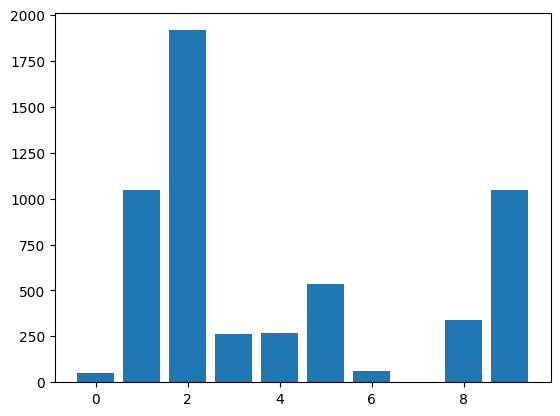

In [25]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot

fs = SelectKBest(score_func=f_classif, k='all')
fs.fit(os_x, os_y)

l = list(os_x.columns)

for i in range(len(fs.scores_)):
    print('Feature {}: {}'.format(l[i], fs.scores_[i]))
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

## Chi Square Test

In [ ]:
imp_var = []
h = dict()
u = dict()
unimp_var = []

# Creating a class for Chi Square Test

class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None
        self.chi2 = None
        self.dof = None

        self.dfTabular = None
        self.dfExpected = None

    # Checking for level of significance

    def _print_chisquare_result(self, colX, alpha):
        if self.p < alpha:
          h[colX] = self.p
        else:
          unimp_var.append(colX)
          u[colX] = self.p

    def TestIndependence(self, colX, colY, alpha = 0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)

        self.dfObserved = pd.crosstab(Y, X)
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof

        self.dfExpected = pd.DataFrame(expected, columns = self.dfObserved.columns, index = self.dfObserved.index)

        self._print_chisquare_result(colX, alpha)

In [ ]:
temp = os_x
temp['corona_result'] = os_y

In [ ]:
cT = ChiSquare(temp)
testColumns = temp.drop(columns = ['corona_result']).columns

# Checking for all features whether they contribute in detecting covid cases or not

for var in testColumns:
    cT.TestIndependence(colX = var, colY = "corona_result")

# Creating a DataFrame to bifurcate Important & Unimportant Features Classified by Chi Square Test

imp = pd.DataFrame()

m = sorted(h.items(), key = lambda x: x[1], reverse = False)

for i in range(len(m)):
  imp_var.append(m[i][0])

if(len(imp_var) > len(unimp_var)):
  for i in range(len(imp_var) - len(unimp_var)):
    unimp_var.append("")
else:
  for i in range(len(unimp_var) - len(imp_var)):
    imp_var.append("")

imp['Important Variables'] = imp_var
imp['Unimportant Variables'] = unimp_var

imp

Important Variables Unimportant Variables
0                       Cough_symptoms                Ind_ID
1                                Fever                      
2                             Headache                      
3  contact_with_covid_positive_patient                      
4                          Sore_throat                      
5                  Shortness_of_breath                      
6                               Abroad                      
7                         Age_60_above                      
8                                  Sex

All the features are contributing towards the detection of covid cases except Ind id dropping that .

# Data Modeling

Train Test Split

In [ ]:
os_x = os_x.drop(['Ind_ID'], axis = 1)
os_x.head()

Cough_symptoms  Fever  Sore_throat  Shortness_of_breath  Headache  \
0               0      0            0                    0         0   
1               0      0            0                    0         0   
2               0      0            0                    0         0   
3               0      0            0                    0         0   
4               0      0            0                    0         0   

   Age_60_above  Sex  Abroad  contact_with_covid_positive_patient  
0             1    0       0                                    0  
1             0    1       0                                    0  
2             0    1       0                                    0  
3             0    1       0                                    0  
4             0    0       1                                    0

In [ ]:
# Setting Train:Test ratio as 70:30

X_train, X_test, Y_train, Y_test = train_test_split(os_x, os_y, test_size = 0.3, random_state = 42)

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
print()
print(Y_train.value_counts())
print()
print(Y_test.value_counts())

(11556, 9) (4953, 9) (11556,) (4953,)

0    7178
1    4378
Name: Corona, dtype: int64

0    3140
1    1813
Name: Corona, dtype: int64


EVALUATION METRICS

We will be using 5 metrics to evaluate our Models.
Metrics - Recall, Specificity, Accuracy, Precision & F1 Score.

In [ ]:
# Function for Model Evaluation

def evaluation_parametrics(name, y_train, yp_train, y_test, yp_test):

    print("\n-----------------------------{}-----------------------------\n".format(name))

    cm_train = confusion_matrix(y_train, yp_train)
    t1 = ConfusionMatrixDisplay(cm_train)
    s1 = round((cm_train[0,0]/(cm_train[0,0] + cm_train[0,1])),4)

    print("Classification Report for Train Data\n")
    print(classification_report(y_train, yp_train))
    print("--------------------------------------------------------------------------")
    print("Recall on Train Data: ", round(recall_score(y_train, yp_train),4))
    print("Specificity on Train Data: ", s1)
    print("Accuracy on Train Data: ", round(accuracy_score(y_train, yp_train),4))
    print("Precision on Train Data: ", round(precision_score(y_train, yp_train),4))
    print("F1 Score on Train Data: ", round(f1_score(y_train, yp_train),4))
    print("--------------------------------------------------------------------------")

    cm_test = confusion_matrix(y_test, yp_test)
    t2 = ConfusionMatrixDisplay(cm_test)
    s2 = round((cm_test[0,0]/(cm_test[0,0] + cm_test[0,1])),4)

    print("\nClassification Report for Test Data\n")
    print(classification_report(y_test, yp_test))
    print("--------------------------------------------------------------------------")
    print("Recall on Test Data: ", round(recall_score(y_test, yp_test), 4))
    print("Specificity on Test Data: ", s2)
    print("Accuracy on Test Data: ", round(accuracy_score(y_test, yp_test), 4))
    print("Precision on Test Data: ", round(precision_score(y_test, yp_test), 4))
    print("F1 Score Test Data: ", round(f1_score(y_test, yp_test), 4))
    print("--------------------------------------------------------------------------")

    t1.plot()
    t2.plot()

**Feature Importance Graph**

In [ ]:
# Function for feature importance graph

def feature_importance(df):

    df = df.sort_values(by = ['Variable Importance Score'], ascending = False)
    fig = px.bar(df, x = 'Features', y = 'Variable Importance Score',
                 color = "Features",
                 color_discrete_sequence = px.colors.sequential.Plasma_r,
                 template ='plotly_dark')

    fig.show()

MODEL 1 - Logistic Regression using GridSearchCv

In [ ]:
grid1 = {"C": np.logspace(-3,3,7), "penalty": ["l1","l2"]}

lr = LogisticRegression(solver = "saga")
lr_cv = GridSearchCV(lr, grid1, cv = 3)
lr_cv.fit(X_train, Y_train)

print("Best Parameters: ", lr_cv.best_params_)
print("Accuracy: ",lr_cv.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/

Best Parameters:  {'C': 10.0, 'penalty': 'l1'}
Accuracy:  0.9759432329525787


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge




-----------------------------Logistic Regression Classifier-----------------------------

Classification Report for Train Data

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      7178
           1       0.96      0.98      0.97      4378

    accuracy                           0.98     11556
   macro avg       0.97      0.98      0.98     11556
weighted avg       0.98      0.98      0.98     11556

--------------------------------------------------------------------------
Recall on Train Data:  0.9815
Specificity on Train Data:  0.9735
Accuracy on Train Data:  0.9765
Precision on Train Data:  0.9577
F1 Score on Train Data:  0.9694
--------------------------------------------------------------------------

Classification Report for Test Data

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3140
           1       0.95      0.98      0.97      1813

    accuracy                  

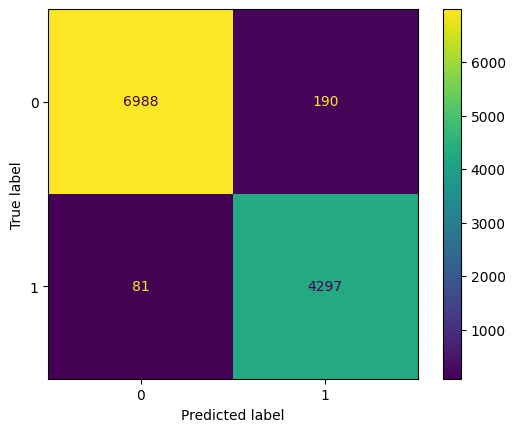

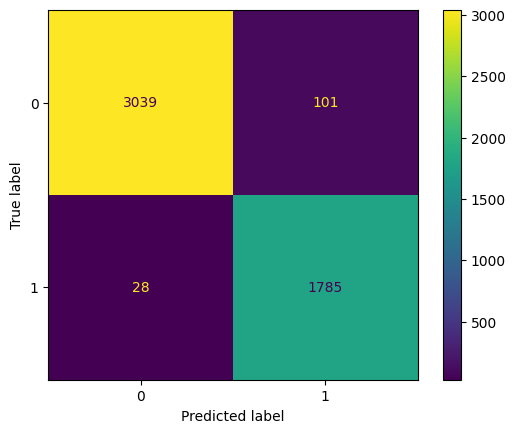

In [ ]:
# Applying Best Parameters Suggested by GridSearch

lr = LogisticRegression(C = 1.0, penalty = 'l1', solver = "saga")

lr.fit(X_train, Y_train)

lr_yp_train = lr.predict(X_train)
lr_yp_test = lr.predict(X_test)

# Model Evaluation

evaluation_parametrics("Logistic Regression Classifier", Y_train, lr_yp_train, Y_test, lr_yp_test)

In [ ]:
# Checking For Variable Importance

d1 = pd.DataFrame({'Features': list(X_train.columns), 'Variable Importance Score': list(np.around(lr.coef_[0],3))})
d1 = d1.sort_values(by = ['Variable Importance Score'], ascending = False)

feature_importance(d1)

**MODEL 2 - Random Forest using GridSearchCv**

In [ ]:
grid2 = {'n_estimators': [200, 300], 'max_depth': [5,6,7,8], 'criterion': ['gini', 'entropy']}

rf = RandomForestClassifier(random_state = 42)
rf_cv = GridSearchCV(rf, grid2, cv = 3)
rf_cv.fit(X_train, Y_train)

print("Best Parameters: ", rf_cv.best_params_)
print("Accuracy: ", rf_cv.best_score_)

Best Parameters:  {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 200}
Accuracy:  0.9803565247490482



-----------------------------Random Forest Classifier-----------------------------

Classification Report for Train Data

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      7178
           1       0.95      1.00      0.98      4378

    accuracy                           0.98     11556
   macro avg       0.98      0.98      0.98     11556
weighted avg       0.98      0.98      0.98     11556

--------------------------------------------------------------------------
Recall on Train Data:  1.0
Specificity on Train Data:  0.9699
Accuracy on Train Data:  0.9813
Precision on Train Data:  0.953
F1 Score on Train Data:  0.9759
--------------------------------------------------------------------------

Classification Report for Test Data

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      3140
           1       0.94      1.00      0.97      1813

    accuracy                           0

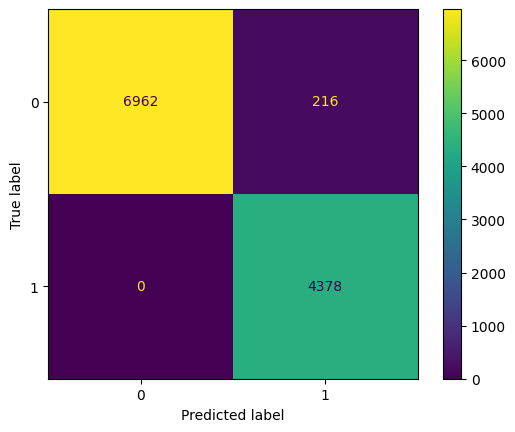

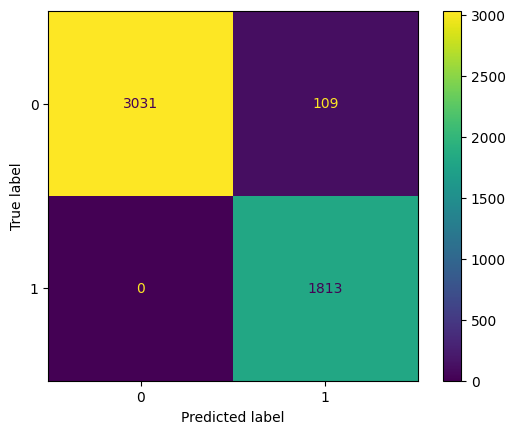

In [ ]:
# Applying Best Parameters Suggested by GridSearch

rf = RandomForestClassifier(n_estimators = 200, max_depth = 8, criterion = 'gini', random_state = 42)

rf.fit(X_train ,Y_train)

rf_yp_train = rf.predict(X_train)
rf_yp_test = rf.predict(X_test)

# Model Evaluation

evaluation_parametrics("Random Forest Classifier", Y_train, rf_yp_train, Y_test, rf_yp_test)

In [ ]:
# Checking For Variable Importance

d2 = pd.DataFrame({'Features': list(X_train.columns), 'Variable Importance Score': list(np.around(rf.feature_importances_,3))})

feature_importance(d2)

MODEL 3 - XGBoost using GridSearchCv

In [ ]:
grid3 = {'gamma': [0.5, 1, 2], 'eta': [0.1, 0.2], 'n_estimators': [200, 300], 'max_depth': [5, 7, 8]}

xgb = XGBClassifier(objective = 'binary:logistic', eval_metric = "logloss", random_state = 42, use_label_encoder = False)
xgb_cv = GridSearchCV(xgb, grid3, cv = 3)
xgb_cv.fit(X_train, Y_train)

print("Best Estimators: ", xgb_cv.best_estimator_)
print("Best Parameters: ", xgb_cv.best_params_)
print("Accuracy: ", xgb_cv.best_score_)

Best Estimators:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric='logloss',
              feature_types=None, gamma=2, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)
Best Parameters:  {'eta': 0.1, 'gamma': 2, 'max_depth': 8, 'n_estimators': 200}
Accuracy:  0.9811353409484251



-----------------------------XgBoost Classifier-----------------------------

Classification Report for Train Data

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      7178
           1       0.95      1.00      0.98      4378

    accuracy                           0.98     11556
   macro avg       0.98      0.98      0.98     11556
weighted avg       0.98      0.98      0.98     11556

--------------------------------------------------------------------------
Recall on Train Data:  1.0
Specificity on Train Data:  0.9696
Accuracy on Train Data:  0.9811
Precision on Train Data:  0.9526
F1 Score on Train Data:  0.9757
--------------------------------------------------------------------------

Classification Report for Test Data

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      3140
           1       0.94      1.00      0.97      1813

    accuracy                           0.98  

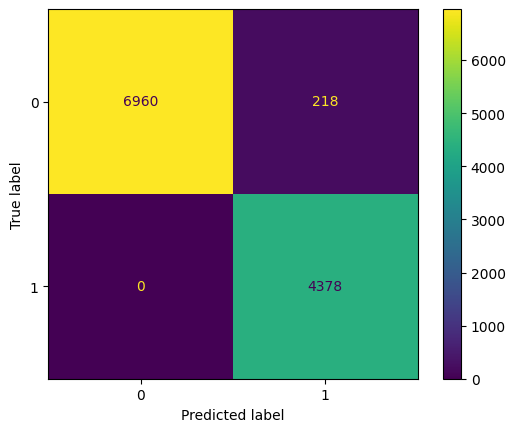

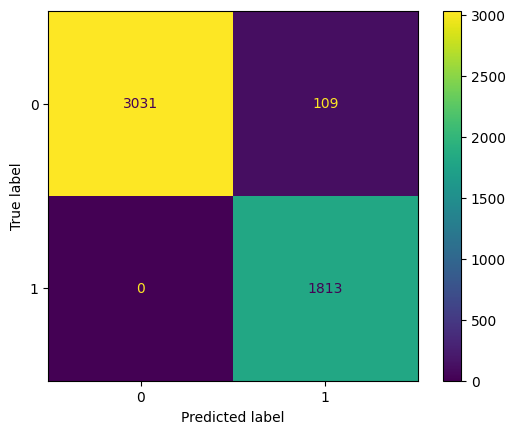

In [ ]:
# Applying Best Parameters Suggested by GridSearch

xgb = XGBClassifier(eta = 0.2, gamma = 0.5, max_depth = 5,
                    n_estimators = 200, objective = 'binary:logistic',
                    eval_metric = "logloss", use_label_encoder = False, random_state = 42)

xgb.fit(X_train ,Y_train)

xgb_yp_train = xgb.predict(X_train)
xgb_yp_test = xgb.predict(X_test)

# Model Evaluation

evaluation_parametrics("XgBoost Classifier", Y_train, xgb_yp_train, Y_test, xgb_yp_test)

In [ ]:
# Checking For Variable Importance

d3 = pd.DataFrame({'Features': list(X_train.columns), 'Variable Importance Score': list(np.around(xgb.feature_importances_,3))})

feature_importance(d3)

# **Conclusion**

1. Data Extraction - Converted the data .
2. Data Preprocessing - Label, One Hot Encoding & Eliminated ambigious records using risk coeficient.
3. Exploratory Data Analysis - Used  Plotly.
4. Feature Selection - Applied Chi Square test. All features were classified as important.
5. Data Modeling - Undersampling Majority Class & 70-30 split as Train - Test Split. Applied GridSearchCv for all 3 models.
6. Model Evaluation - Calculated all the metrics using Confusion Matrix